# Assignment 3 - 2 (MLFFNN)

Team members:
- N Sowmya Manojna (BE17B007)
- Thakkar Riya Anandbhai (PH17B010)
- Chaithanya Krishna Moorthy (PH17B011)

## Import Essential Libraries

In [1]:
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import warnings
warnings.filterwarnings("ignore")

from gridsearch import GridSearch2A

## Reading the data, Splitting it

In [2]:
# Get the data
df = pd.read_csv("../datasets/2A/train_new.csv")
df_test = pd.read_csv("../datasets/2A/dev_new.csv")
display(df.head())

# Split dev into test and validation
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=42)
display(df_val.head())
display(df_test.head())

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.301071,0.207291,0.163574,0.080124,0.054138,0.041107,0.048340,0.104355,0.028275,...,0.211029,0.176437,0.016968,0.029282,0.108093,0.173035,0.205368,0.192215,0.143951,0.131088
1,0,0.149094,0.178650,0.383118,0.217911,0.069717,0.001373,0.000122,0.000015,0.127670,...,0.003387,0.000168,0.121246,0.041306,0.045090,0.160141,0.290756,0.318909,0.022049,0.000504
2,0,0.033218,0.092514,0.107178,0.058289,0.397430,0.066330,0.238052,0.006989,0.000793,...,0.231079,0.003769,0.001465,0.004150,0.006897,0.028931,0.283752,0.127716,0.543488,0.003601
3,0,0.009476,0.132507,0.375351,0.090302,0.271347,0.112000,0.008942,0.000076,0.007553,...,0.096375,0.010620,0.007843,0.000443,0.030304,0.102646,0.246140,0.513321,0.088379,0.010925
4,0,0.169357,0.262299,0.253281,0.152527,0.092209,0.038757,0.016174,0.015396,0.082397,...,0.020676,0.015976,0.072647,0.077484,0.163315,0.186646,0.181931,0.196167,0.090378,0.031433


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
266,3,0.207474,0.264450,0.094421,0.057404,0.023254,0.015213,0.019867,0.317917,0.126999,...,0.015518,0.348007,0.261932,0.197449,0.042343,0.037567,0.049713,0.029388,0.015289,0.366318
163,2,0.456207,0.072144,0.071976,0.078415,0.068756,0.058701,0.050797,0.143005,0.409531,...,0.063812,0.129852,0.376389,0.070969,0.031128,0.033157,0.049011,0.124374,0.134033,0.180939
152,2,0.696671,0.075043,0.042969,0.032593,0.024460,0.023254,0.031128,0.073883,0.671646,...,0.030426,0.074997,0.655106,0.072983,0.058853,0.044220,0.029526,0.026093,0.034698,0.078522
19,0,0.016556,0.238937,0.138321,0.069473,0.048096,0.048523,0.096878,0.343216,0.206787,...,0.040695,0.025192,0.937653,0.047638,0.010376,0.002518,0.000748,0.000732,0.000336,0.000000
223,3,0.339432,0.325745,0.071228,0.062363,0.028564,0.019608,0.009705,0.143356,0.230927,...,0.027664,0.162735,0.462479,0.205551,0.033432,0.008896,0.013138,0.028839,0.045441,0.202225


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
219,3,0.158585,0.134903,0.102386,0.100128,0.078690,0.071960,0.087524,0.265823,0.155670,...,0.079834,0.239807,0.272598,0.156586,0.097137,0.072281,0.082184,0.072418,0.020569,0.226227
42,0,0.276459,0.036407,0.025345,0.107635,0.167801,0.138336,0.171936,0.076080,0.211014,...,0.167389,0.142151,0.187576,0.102997,0.024231,0.024338,0.070267,0.221176,0.156128,0.213287
211,3,0.027817,0.083313,0.217896,0.301102,0.243546,0.121887,0.003296,0.001144,0.001831,...,0.032196,0.001541,0.066345,0.129166,0.154922,0.081436,0.049789,0.040573,0.117401,0.360367
193,2,0.116089,0.124466,0.351288,0.126297,0.199615,0.081238,0.000748,0.000259,0.104462,...,0.133316,0.000885,0.094650,0.044830,0.315262,0.238190,0.034134,0.007690,0.033722,0.231522
56,0,0.128036,0.056778,0.075409,0.073059,0.085754,0.132904,0.143372,0.304688,0.147095,...,0.156586,0.266907,0.145401,0.037704,0.066437,0.096207,0.109009,0.115204,0.139206,0.290833


In [3]:
X_train = df.drop("class", axis=1)
y_train = df["class"].to_numpy().astype("int")

X_val = df_val.drop("class", axis=1)
y_val = df_val["class"].to_numpy().astype("int")

X_test = df_test.drop("class", axis=1)
y_test = df_test["class"].to_numpy().astype("int")

In [4]:
display(df.describe())
display(df_val.describe())
display(df_test.describe())

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,...,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,2.082114,0.130123,0.159496,0.170261,0.179880,0.143707,0.098437,0.067923,0.050173,0.076561,...,0.088213,0.049609,0.098092,0.133911,0.148876,0.140294,0.118017,0.130335,0.146645,0.083830
std,1.414992,0.139384,0.115305,0.101544,0.127918,0.104810,0.087570,0.077305,0.088881,0.099470,...,0.091874,0.084965,0.122926,0.109955,0.104837,0.107968,0.106486,0.121967,0.138094,0.120898
min,0.000000,0.000000,0.000000,0.000183,0.000290,0.000153,0.000092,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000107,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.021271,0.073769,0.093685,0.090099,0.067581,0.036858,0.013313,0.002090,0.007381,...,0.019249,0.002457,0.011002,0.052113,0.071686,0.062992,0.039211,0.035313,0.029911,0.002357
50%,2.000000,0.079811,0.132607,0.151779,0.148178,0.116547,0.075455,0.040344,0.012970,0.035011,...,0.057632,0.012489,0.046349,0.110115,0.127586,0.113205,0.090080,0.098099,0.108528,0.023926
75%,3.000000,0.199257,0.218723,0.227001,0.232304,0.197056,0.129009,0.092857,0.053162,0.111664,...,0.125469,0.053864,0.146042,0.189438,0.199055,0.195148,0.167446,0.192104,0.229473,0.120110
max,4.000000,0.747253,0.707184,0.756271,0.923935,0.701630,0.534073,0.513519,0.630173,0.728363,...,0.540375,0.634964,0.902054,0.770370,0.660553,0.784775,0.665985,0.753799,0.792847,0.848770


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2.117409,0.151113,0.154674,0.158812,0.157134,0.139483,0.105445,0.066335,0.067004,0.102797,...,0.083449,0.064090,0.126458,0.137739,0.145894,0.133994,0.122327,0.126535,0.107182,0.099870
std,1.410753,0.176317,0.100732,0.102118,0.112192,0.119647,0.098676,0.072623,0.105435,0.131703,...,0.097644,0.092579,0.160955,0.098513,0.099346,0.097677,0.097199,0.117688,0.114717,0.131450
min,0.000000,0.000000,0.000000,0.004669,0.004593,0.000061,0.000076,0.000015,0.000000,0.000000,...,0.000015,0.000000,0.000000,0.000000,0.003677,0.002518,0.000748,0.000015,0.000000,0.000000
25%,1.000000,0.019279,0.078224,0.082375,0.074310,0.049454,0.036362,0.014069,0.004013,0.007744,...,0.020065,0.003349,0.012604,0.056038,0.068886,0.055412,0.046471,0.033638,0.016930,0.002838
50%,2.000000,0.078568,0.137558,0.149292,0.129395,0.104752,0.073624,0.040833,0.024582,0.049683,...,0.044724,0.023621,0.066452,0.119080,0.134857,0.114380,0.095825,0.087036,0.059204,0.028809
75%,3.000000,0.215843,0.216660,0.220375,0.218971,0.184891,0.138947,0.100868,0.079361,0.152458,...,0.116257,0.084038,0.172691,0.206642,0.202660,0.189896,0.190033,0.196075,0.161171,0.177139
max,4.000000,0.719177,0.535110,0.770569,0.660553,0.681564,0.630981,0.377777,0.781326,0.671646,...,0.580765,0.534744,0.937653,0.459473,0.623611,0.486237,0.457397,0.555206,0.446960,0.600403


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,1.971698,0.141490,0.151979,0.165933,0.158516,0.141089,0.094907,0.074844,0.071242,0.096579,...,0.094637,0.068669,0.134458,0.153398,0.144930,0.124869,0.112059,0.125502,0.098699,0.106085
std,1.437309,0.156693,0.106455,0.091691,0.112294,0.124764,0.073098,0.084070,0.088373,0.115282,...,0.100945,0.094097,0.167284,0.135631,0.106690,0.093058,0.100827,0.136312,0.108506,0.143227
min,0.000000,0.000000,0.002472,0.014114,0.015091,0.008072,0.007187,0.000381,0.000046,0.000000,...,0.000000,0.000000,0.000000,0.000122,0.000595,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.019321,0.069981,0.088970,0.080795,0.054512,0.038815,0.014618,0.007790,0.004501,...,0.020908,0.004230,0.013405,0.053307,0.069740,0.060989,0.041489,0.028229,0.015278,0.001446
50%,2.000000,0.094200,0.136673,0.152962,0.131470,0.102310,0.077896,0.047112,0.036415,0.054550,...,0.056953,0.029373,0.067970,0.129631,0.119576,0.096260,0.082603,0.077644,0.056297,0.030869
75%,3.000000,0.195198,0.207428,0.219807,0.202526,0.183540,0.132469,0.090134,0.101707,0.153526,...,0.138584,0.087219,0.190426,0.213467,0.192463,0.162102,0.150074,0.177731,0.150982,0.183746
max,4.000000,0.778595,0.490692,0.406876,0.613434,0.638458,0.326660,0.380203,0.420441,0.496582,...,0.472839,0.424042,0.988144,0.934540,0.665955,0.516022,0.427811,0.640350,0.441315,0.585312


## Preprocessing Dataset

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

display(X_train_scaled.describe())
display(X_val_scaled.describe())
display(X_test_scaled.describe())

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,...,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03,1.230000e+03
mean,3.466062e-17,1.733031e-17,-1.155354e-16,3.466062e-17,9.242832e-17,1.501960e-16,8.087478e-17,5.776770e-17,-5.776770e-17,-1.270889e-16,...,2.743966e-17,2.888385e-17,4.621416e-17,6.932124e-17,-1.530844e-16,3.466062e-16,4.621416e-17,-1.848566e-16,-1.155354e-17,-8.665155e-17
std,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,...,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00,1.000407e+00
min,-9.339364e-01,-1.383807e+00,-1.675597e+00,-1.404521e+00,-1.370219e+00,-1.123506e+00,-8.789892e-01,-5.647310e-01,-7.700033e-01,-1.272813e+00,...,-9.605440e-01,-5.841071e-01,-7.982956e-01,-1.218360e+00,-1.420650e+00,-1.298950e+00,-1.108739e+00,-1.069044e+00,-1.062353e+00,-6.936786e-01
25%,-7.812690e-01,-7.437795e-01,-7.544201e-01,-7.021479e-01,-7.266170e-01,-7.034897e-01,-7.067016e-01,-5.412018e-01,-6.957657e-01,-7.920716e-01,...,-7.509438e-01,-5.551815e-01,-7.087617e-01,-7.442233e-01,-7.365880e-01,-7.162680e-01,-7.403590e-01,-7.794004e-01,-8.456660e-01,-6.741708e-01
50%,-3.611053e-01,-2.332931e-01,-1.820809e-01,-2.479307e-01,-2.592449e-01,-2.625551e-01,-3.568935e-01,-4.187467e-01,-4.178834e-01,-1.672237e-01,...,-3.329896e-01,-4.370537e-01,-4.210985e-01,-2.164988e-01,-2.031565e-01,-2.510059e-01,-2.624581e-01,-2.644128e-01,-2.761329e-01,-4.956973e-01
75%,4.961975e-01,5.138691e-01,5.590023e-01,4.099907e-01,5.092100e-01,3.492536e-01,3.226800e-01,3.363309e-02,3.530358e-01,5.506061e-01,...,4.056787e-01,5.009969e-02,3.902323e-01,5.052047e-01,4.788305e-01,5.082660e-01,4.643741e-01,5.066450e-01,6.000400e-01,3.002052e-01
max,4.429353e+00,4.751826e+00,5.773343e+00,5.819039e+00,5.325334e+00,4.976714e+00,5.766476e+00,6.528219e+00,6.555379e+00,5.220477e+00,...,4.923547e+00,6.892167e+00,6.542860e+00,5.790710e+00,4.882680e+00,5.971624e+00,5.148018e+00,5.113811e+00,4.681339e+00,6.329733e+00


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.150650,-0.041831,-0.112794,-0.177886,-0.040322,0.080058,-0.020543,0.189433,0.263864,0.077307,...,-0.051877,0.170507,0.230856,0.034834,-0.028457,-0.058379,0.040496,-0.031171,-0.285884,0.132726
std,1.265490,0.873962,1.006060,0.877423,1.142020,1.127280,0.939816,1.186735,1.324578,0.943604,...,1.063232,1.090061,1.309896,0.896300,0.948009,0.905053,0.913160,0.965306,0.831057,1.087726
min,-0.933936,-1.383807,-1.631400,-1.370869,-1.371092,-1.123681,-0.878792,-0.564731,-0.770003,-1.272813,...,-0.960378,-0.584107,-0.798296,-1.218360,-1.385559,-1.276611,-1.101714,-1.068919,-1.062353,-0.693679
25%,-0.795561,-0.705122,-0.865851,-0.825629,-0.899642,-0.709155,-0.696927,-0.519562,-0.692121,-0.668121,...,-0.742055,-0.544671,-0.695723,-0.708509,-0.763307,-0.786501,-0.672159,-0.793136,-0.939708,-0.670194
50%,-0.370031,-0.190333,-0.206584,-0.394832,-0.371828,-0.283473,-0.350575,-0.288048,-0.270329,-0.028214,...,-0.473554,-0.305990,-0.257491,-0.134937,-0.133775,-0.240119,-0.208486,-0.355151,-0.633456,-0.455293
75%,0.615243,0.495964,0.493722,0.305722,0.393095,0.462777,0.426349,0.328521,0.763318,0.739041,...,0.305365,0.405381,0.607113,0.661735,0.513230,0.459594,0.676571,0.539217,0.105232,0.772115
max,4.227841,3.258892,5.914201,3.759205,5.133812,6.083800,4.009833,8.229538,5.984958,3.442082,...,5.363350,5.712147,6.832572,2.962065,4.530165,3.205429,3.188391,3.484900,2.175603,4.274541


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.081586,-0.065216,-0.042642,-0.167080,-0.024991,-0.040329,0.089571,0.237139,0.201325,0.139476,...,0.069948,0.224423,0.295956,0.177302,-0.037652,-0.142932,-0.055970,-0.039646,-0.347339,0.184157
std,1.124641,0.923620,0.903331,0.878219,1.190866,0.835072,1.087948,0.994691,1.159426,1.146141,...,1.099176,1.107930,1.361401,1.234014,1.018089,0.862259,0.947245,1.118068,0.786057,1.185179
min,-0.933936,-1.362360,-1.538347,-1.288767,-1.294629,-1.042449,-0.874053,-0.564216,-0.770003,-1.269261,...,-0.960544,-0.584107,-0.798296,-1.217249,-1.414971,-1.299940,-1.108739,-1.069044,-1.062353,-0.693679
25%,-0.795260,-0.776645,-0.800872,-0.774912,-0.851361,-0.681134,-0.689818,-0.477055,-0.724732,-0.781453,...,-0.732875,-0.534296,-0.689203,-0.733360,-0.755153,-0.734825,-0.718964,-0.837504,-0.951674,-0.681715
50%,-0.257830,-0.198012,-0.170430,-0.378602,-0.395131,-0.234664,-0.269318,-0.154858,-0.221375,-0.165370,...,-0.340383,-0.238258,-0.245135,-0.038936,-0.279600,-0.408014,-0.332701,-0.432185,-0.654514,-0.438247
75%,0.467066,0.415869,0.488122,0.177109,0.380206,0.388780,0.287433,0.580044,0.774060,0.787888,...,0.548486,0.442841,0.751441,0.723826,0.415928,0.202062,0.301168,0.388748,0.031419,0.826787
max,4.654302,2.873512,2.331115,3.390700,4.722368,2.607224,4.041230,4.167566,4.224282,3.868069,...,4.188160,4.408699,7.243484,7.284373,4.934224,3.481412,2.910431,4.183273,2.134703,4.149666


## Training the Model

In [6]:
parameters = {
              "pca__n_components":list(range(1,25)),
              "mlp__hidden_layer_sizes":[(10,10), (25,25), (50,50), (75,75)], \
              "mlp__batch_size":[50, 100, "auto"], "mlp__alpha":[0.01, 0.001], \
              "mlp__learning_rate":["constant", "adaptive", "invscaling"], \
              "mlp__early_stopping":[True, False]
             }

model = Pipeline([('pca', PCA()), ('mlp', MLPClassifier(max_iter=500, random_state=1))])

clf = GridSearch2A(model, parameters, verbose=1)
clf.fit(X_train, y_train, X_val, y_val)
result_df = pd.DataFrame(clf.cv_results_)
result_df.to_csv("../parameter_search/2A_MLFFNN_train_val.csv")
display(result_df.head(10))

100%|██████████| 1728/1728 [3:50:23<00:00,  8.00s/it]  


,n_components,hidden_layer_sizes,learning_rate,batch_size,alpha,accuracy,val_accuracy,sum_accuracy,t_inv
0,16,"(50, 50)",invscaling,auto,0.001,79.024390,52.226721,131.251111,0.090667
1,16,"(50, 50)",adaptive,auto,0.001,79.024390,52.226721,131.251111,0.089652
2,16,"(50, 50)",constant,auto,0.001,79.024390,52.226721,131.251111,0.079719
3,20,"(50, 50)",constant,auto,0.010,82.926829,51.821862,134.748692,0.101519
4,20,"(50, 50)",adaptive,auto,0.010,82.926829,51.821862,134.748692,0.097485
5,20,"(50, 50)",invscaling,auto,0.010,82.926829,51.821862,134.748692,0.094911
6,8,"(75, 75)",invscaling,100,0.010,75.447154,51.821862,127.269017,0.067131
7,19,"(25, 25)",adaptive,auto,0.001,68.048780,51.417004,119.465785,0.348736
8,19,"(25, 25)",constant,auto,0.001,68.048780,51.417004,119.465785,0.347339
9,19,"(25, 25)",invscaling,auto,0.001,68.048780,51.417004,119.465785,0.327999


In [10]:
clf.cv_results_ = clf.cv_results_.sort_values(by=["sum_accuracy", "val_accuracy", "accuracy", "t_inv"], ascending=False, ignore_index=True)

clf.best_params_ = clf.cv_results_.iloc[0].to_dict()
del clf.best_params_["accuracy"]
del clf.best_params_["val_accuracy"]
del clf.best_params_["sum_accuracy"]
del clf.best_params_["t_inv"]

In [11]:
print("Best Parameters Choosen:")
for i in clf.best_params_:
    print("  - ", i, ": ", clf.best_params_[i], sep="")

pca_params = {}
pca_params["n_components"] = clf.best_params_["n_components"]
mlp_params = clf.best_params_
del mlp_params["n_components"]

best_model = Pipeline([('pca', PCA(**pca_params)), \
                       ('mlp', MLPClassifier(max_iter=500, random_state=1, **mlp_params))])
best_model.fit(X_train, y_train)

Best Parameters Choosen:
  - n_components: 20
  - hidden_layer_sizes: (75, 75)
  - learning_rate: invscaling
  - batch_size: 100
  - alpha: 0.001


Pipeline(steps=[('pca', PCA(n_components=20)),
                ('mlp',
                 MLPClassifier(alpha=0.001, batch_size=100,
                               hidden_layer_sizes=(75, 75),
                               learning_rate='invscaling', max_iter=500,
                               random_state=1))])

Accuracy: 98.69918699186992


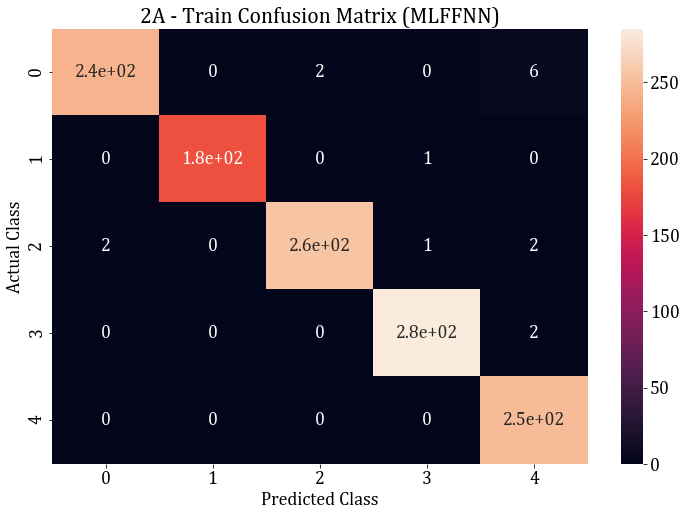

Validation Accuracy: 49.392712550607285


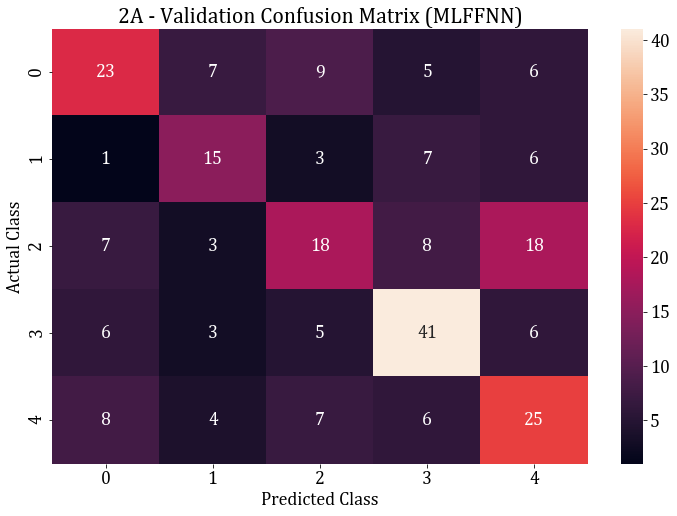

Test Accuracy: 35.84905660377358


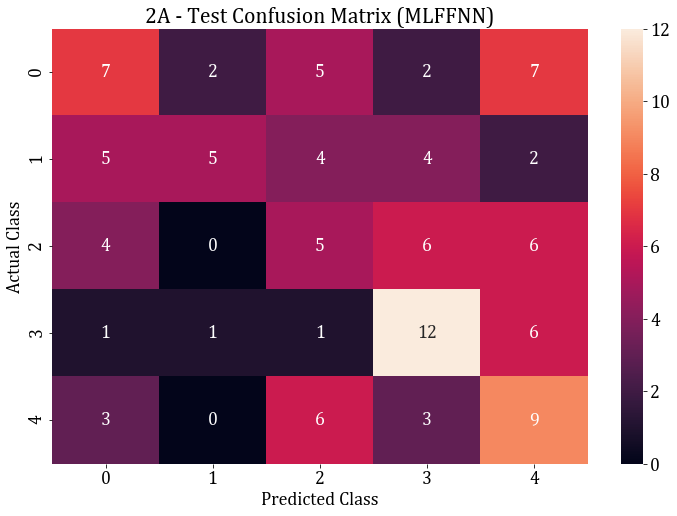

In [13]:
y_pred = best_model.predict(X_train)
print("Accuracy:", 100*np.sum(y_pred==y_train)/y_train.size)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("2A - Train Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/2A_MLFFNN_train_confmat.png")
plt.show()

y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", 100*np.sum(y_val_pred==y_val)/y_val.size)
val_conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure()
sns.heatmap(val_conf_mat, annot=True)
plt.title("2A - Validation Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/2A_MLFFNN_val_confmat.png")
plt.show()

y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", 100*np.sum(y_test_pred==y_test)/y_test.size)
test_conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(test_conf_mat, annot=True)
plt.title("2A - Test Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/2A_MLFFNN_test_confmat.png")
plt.show()